<a href="https://colab.research.google.com/github/ShrutiShikha206/ShrutiShikha206/blob/main/Historical_Product_Demand_4(Capstone_Project)_Shruti_Shikha_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# Import the dataset from the specified file path
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Historical Product Demand.csv')

# Display the first few rows of the DataFrame
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [ ]:
# Print the dimensions (number of rows and columns) of the DataFrame
df.shape

(1048575, 5)

Due to large dataset and slow processing we are taking 50,000 rows as sample


In [ ]:
# Randomly sample 50,000 data points
sample_size = 50000
df = df.sample(n=sample_size, random_state=42)  # You can change the random_state for different samples

# 'sampled_data' now contains random sample of 50,000 data points

In [ ]:
# Display summary statistics for the DataFrame
df.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,50000,50000,50000,49472,50000
unique,2077,4,33,1488,946
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,793,36602,23085,113,5473


In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 781974 to 217021
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Code      50000 non-null  object
 1   Warehouse         50000 non-null  object
 2   Product_Category  50000 non-null  object
 3   Date              49472 non-null  object
 4   Order_Demand      50000 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


# **Data Preprocessing**

In [ ]:
# Display the count of missing values in the DataFrame
df.isnull().sum()

Product_Code          0
Warehouse             0
Product_Category      0
Date                528
Order_Demand          0
dtype: int64

In [ ]:
# Remove rows with missing values (NaN)
df = df.dropna()

# Display the new dimensions (number of rows and columns) of the DataFrame
df.shape

(49472, 5)

In [ ]:
# Display the count of missing values in the DataFrame
df.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [ ]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [ ]:
# Convert the 'Date' column to a datetime data type
df["Date"] = pd.to_datetime(df['Date'])

In [ ]:
#Changing the datatype from object to float format
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'], errors='coerce')

In [ ]:
# Display summary statistics for the DataFrame
df.describe()

,Order_Demand
count,4.920400e+04
mean,5.148667e+03
std,3.522514e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,3.000000e+06


In [ ]:
# Display the first few rows of the DataFrame
df.head(5)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
781974,Product_0200,Whse_A,Category_007,2015-11-06,20.0
937737,Product_1539,Whse_J,Category_019,2016-04-14,950.0
907828,Product_0202,Whse_C,Category_007,2016-11-23,320.0
784628,Product_1461,Whse_A,Category_019,2015-09-23,1000.0
662460,Product_0608,Whse_J,Category_001,2015-04-01,1.0


In [ ]:
# If you want to count the duplicates, you can use the `duplicated` function with `sum()`
df.duplicated().sum()

422

In [ ]:
# If you want to drop the duplicate rows, you can use `drop_duplicates`
df_no_duplicates = df.drop_duplicates()

# If you want to keep the first occurrence and remove subsequent duplicates, you can use `drop_duplicates`
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Print the dimensions (number of rows and columns) of the DataFrame
df.shape

(49050, 5)

In [ ]:
#number of types of Product_Code
len(df.Product_Code.unique())

2077

## **EDA on Product_Category**

In [ ]:
#length of unique variables in Product Category Column
len(df.Product_Category.unique())

33

In [ ]:
# Calculate and display the count of each unique 'Product_Category', sorted in descending order
PC_count = df.groupby('Product_Category')['Product_Category'].agg('count').sort_values(ascending=False)
PC_count

Product_Category
Category_019    22285
Category_005     4807
Category_001     4538
Category_007     3961
Category_021     2423
Category_006     1650
Category_028     1499
Category_015     1126
Category_011     1091
Category_024      980
Category_009      931
Category_026      689
Category_030      633
Category_032      459
Category_022      378
Category_023      366
Category_018      237
Category_003      184
Category_020      179
Category_013      177
Category_031      104
Category_033       98
Category_008       64
Category_012       58
Category_010       52
Category_029       27
Category_017       25
Category_004       15
Category_002        6
Category_014        3
Category_016        2
Category_025        2
Category_027        1
Name: Product_Category, dtype: int64

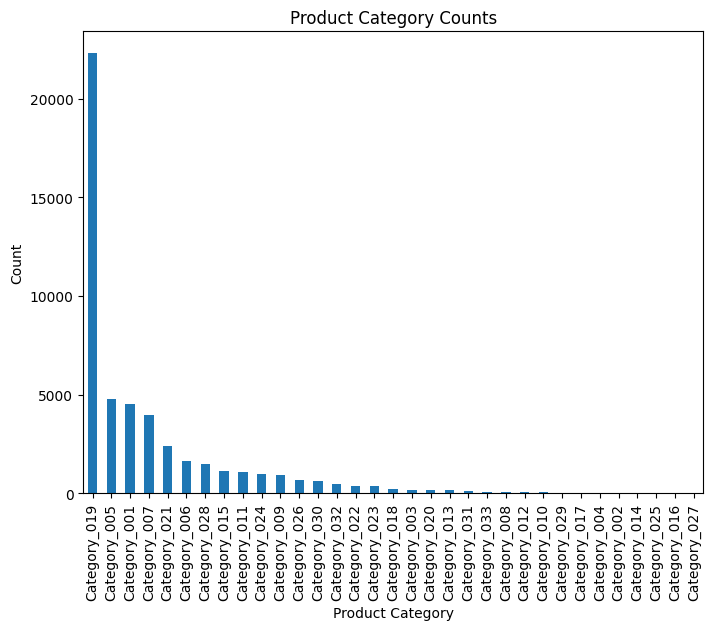

In [ ]:
# Create a bar plot to visualize the counts of each unique 'Product_Category'
df['Product_Category'].value_counts().plot(kind='bar', figsize=(8, 6))

# Set title and labels
plt.title('Product Category Counts')
plt.xlabel('Product Category')
plt.ylabel('Count')

plt.show()

Observation 1: This analysis clearly reveals that the product category 'Category_019' ranks as the top-selling category, outperforming all other categories in terms of sales and demand.

> Indented block









## **EDA on Warehouse**

In [ ]:
# Count the number of unique values in the 'Warehouse' column
len(df.Warehouse.unique())

4

In [ ]:
# Calculate and display the count of each unique 'Warehouse', sorted in ascending order
Warehouse_count = df.groupby('Warehouse')['Warehouse'].agg('count').sort_values(ascending=True)
Warehouse_count

Warehouse
Whse_C     1963
Whse_S     4141
Whse_A     6665
Whse_J    36281
Name: Warehouse, dtype: int64

<Axes: ylabel='Warehouse'>

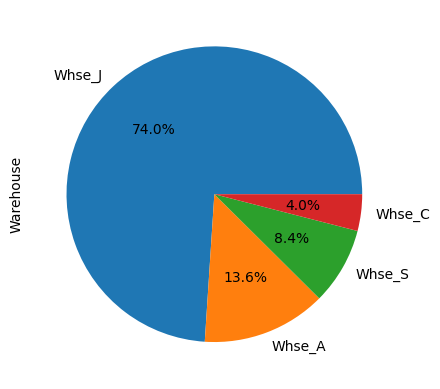

In [ ]:
# Create a pie chart to visualize the distribution of values in the 'Warehouse' column
df['Warehouse'].value_counts().plot(kind='pie', autopct='%0.1f%%')

Observation 2: Warehouse-J holds the distinction of having the highest maximum order demand, followed by Warehouse-A, Warehouse-S, and Warehouse-C, in descending order of their maximum demand levels.






## **EDA on Date**

In [ ]:
# Display the data types of columns, with a focus on 'date' and 'order demand'
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand               float64
dtype: object

In [ ]:
# Extract the year from the 'Date' column and create a new 'year' column
df['year'] = df['Date'].dt.year
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,year
781974,Product_0200,Whse_A,Category_007,2015-11-06,20.0,2015
937737,Product_1539,Whse_J,Category_019,2016-04-14,950.0,2016
907828,Product_0202,Whse_C,Category_007,2016-11-23,320.0,2016
784628,Product_1461,Whse_A,Category_019,2015-09-23,1000.0,2015
662460,Product_0608,Whse_J,Category_001,2015-04-01,1.0,2015


In [ ]:
year_count = df['year'].value_counts().reset_index().rename(columns={'index': 'year', 'year': 'count'})
year_count = year_count.sort_values(by='year')
year_count

,year,count
5,2011,27
3,2012,9643
0,2013,10444
1,2014,10102
2,2015,9777
4,2016,9056
6,2017,1


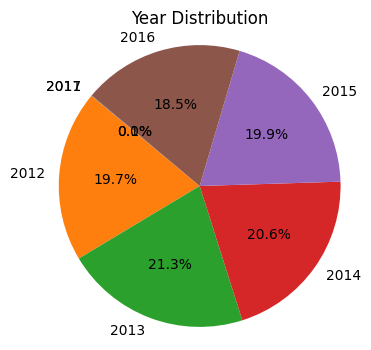

In [ ]:
# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(year_count['count'], labels=year_count['year'], autopct='%1.1f%%', startangle=140)
plt.title('Year Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Observation 3: There is a strikingly marginal variance in the number of product categories demanded annually, with the exception of 2011, where the demand for products is nearly negligible.






In [ ]:
# Create "month" column
df['month'] = df['Date'].dt.strftime('%m')

In [ ]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,year,month
781974,Product_0200,Whse_A,Category_007,2015-11-06,20.0,2015,11
937737,Product_1539,Whse_J,Category_019,2016-04-14,950.0,2016,04
907828,Product_0202,Whse_C,Category_007,2016-11-23,320.0,2016,11
784628,Product_1461,Whse_A,Category_019,2015-09-23,1000.0,2015,09
662460,Product_0608,Whse_J,Category_001,2015-04-01,1.0,2015,04


In [ ]:
# Create "month" column
month_count = df['month'].value_counts().reset_index().rename(columns={'index': 'month', 'month': 'count'})
month_count = month_count.sort_values(by='month')
month_count

,month,count
7,01,4011
2,02,4286
1,03,4396
8,04,4008
9,05,3799
6,06,4012
4,07,4207
10,08,3723
5,09,4100
0,10,4565


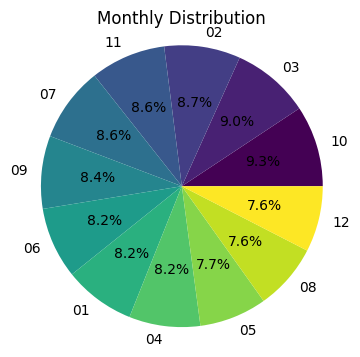

In [ ]:
# Create a pie chart to visualize the distribution of values in the 'Warehouse' column
# Count the occurrences of each unique value in the 'month' column
month_counts = df['month'].value_counts()

# Define a custom colormap with a gradient from light to dark
n = len(month_counts)
colors = plt.cm.viridis(np.linspace(0, 1, n))

# Create a pie chart with the custom colormap
plt.figure(figsize=(4,4))
plt.pie(month_counts, labels=month_counts.index, autopct='%0.1f%%', colors=colors)

plt.title('Monthly Distribution')
plt.axis('equal')

plt.show()

Observation 4: The graph clearly illustrates that October experiences the highest demand for products, while December records the lowest demand throughout the observed period.

### **EDA on Order Demand**

In [ ]:
df.describe()

,Order_Demand,year
count,4.878200e+04,49050.000000
mean,5.167828e+03,2013.960877
std,3.536838e+04,1.393123
min,0.000000e+00,2011.000000
25%,2.000000e+01,2013.000000
50%,3.000000e+02,2014.000000
75%,2.000000e+03,2015.000000
max,3.000000e+06,2017.000000


<ipython-input-40-ac10b05e66dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Order_Demand'])


<Axes: xlabel='Order_Demand', ylabel='Density'>

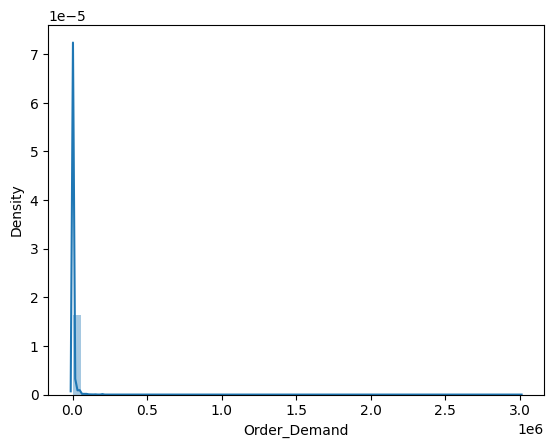

In [ ]:
sns.distplot(df['Order_Demand'])

## **Outlier Treatment**

In [ ]:
  #calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) of the 'Order_Demand' column in the DataFrame df
q1 = df['Order_Demand'].quantile(0.25)
q3 = df['Order_Demand'].quantile(0.75)
iqr = q3-q1

In [ ]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-2950.0, 4970.0)

In [ ]:
# find the outliers
df.loc[(df['Order_Demand'] > upper_limit) | (df['Order_Demand'] < lower_limit)]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,year,month
749979,Product_1382,Whse_J,Category_019,2015-09-07,10000.0,2015,09
17327,Product_1237,Whse_S,Category_019,2012-05-22,100000.0,2012,05
658472,Product_1315,Whse_J,Category_019,2015-06-05,5000.0,2015,06
677891,Product_1248,Whse_J,Category_019,2015-10-20,5000.0,2015,10
754087,Product_1453,Whse_J,Category_019,2015-02-02,5000.0,2015,02
...,...,...,...,...,...,...,...
26813,Product_1439,Whse_J,Category_019,2012-05-15,5000.0,2012,05
453092,Product_2006,Whse_J,Category_005,2014-05-19,10800.0,2014,05
685181,Product_1378,Whse_J,Category_019,2015-06-22,20000.0,2015,06
226806,Product_1359,Whse_J,Category_019,2013-01-10,20000.0,2013,01


In [ ]:
# trimming - delete the outlier data
new_df = df.loc[(df['Order_Demand'] <= upper_limit) & (df['Order_Demand'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 49050
after removing outliers: 40370
outliers: 8680


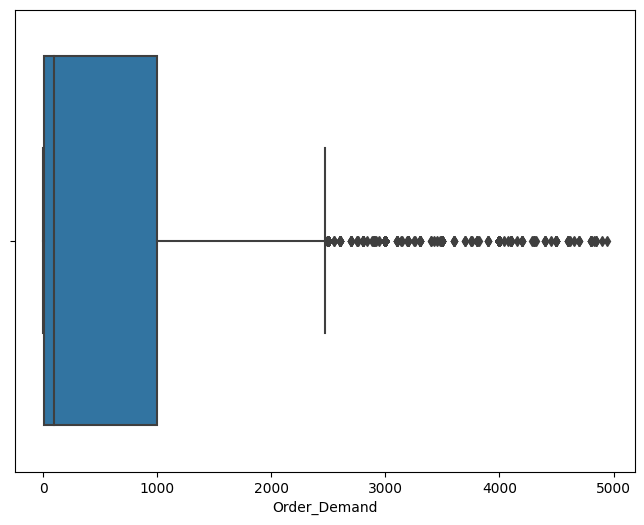

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Order_Demand', data=new_df)

plt.show()


In [ ]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['Order_Demand']>upper_limit), 'Order_Demand'] = upper_limit
new_df.loc[(new_df['Order_Demand']<lower_limit), 'Order_Demand'] = lower_limit

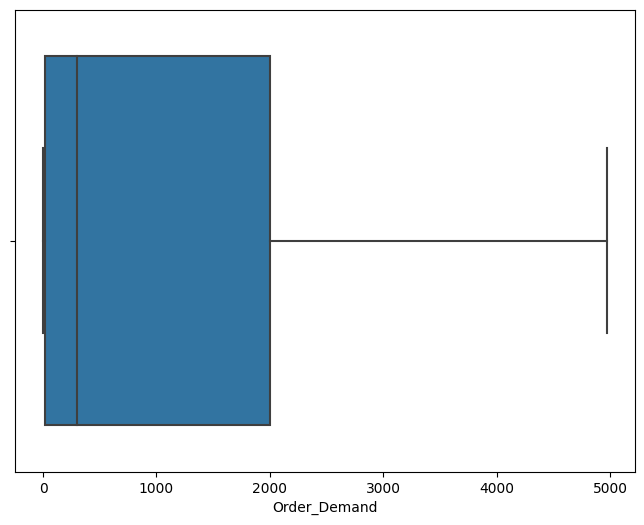

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Order_Demand', data=new_df)

plt.show()


In [ ]:
df = new_df

<ipython-input-49-ac10b05e66dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Order_Demand'])


<Axes: xlabel='Order_Demand', ylabel='Density'>

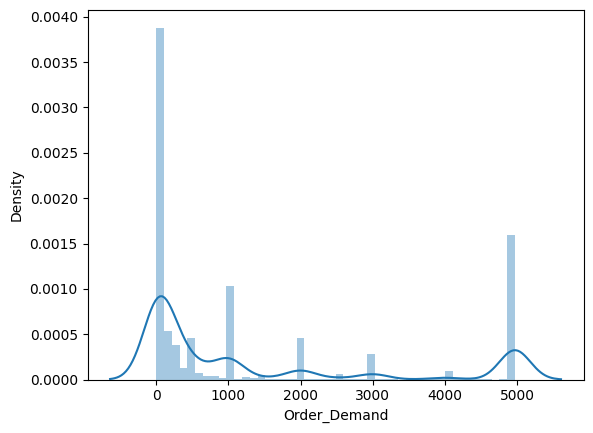

In [ ]:
sns.distplot(df['Order_Demand'])

In [ ]:
yearly_sums = df.groupby('year')['Order_Demand'].sum()


In [ ]:
df_yearly_sums = pd.DataFrame(list(yearly_sums.items()), columns=['Year', 'Sum of Values'])
df_yearly_sums

,Year,Sum of Values
0,2011,36713.0
1,2012,12711301.0
2,2013,13624791.0
3,2014,13182962.0
4,2015,13194404.0
5,2016,12296589.0
6,2017,1000.0


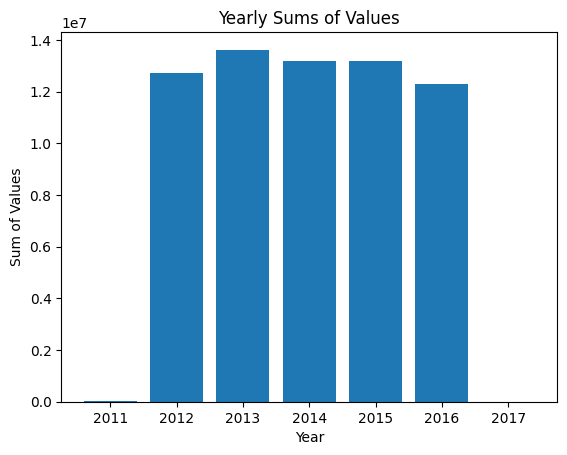

In [ ]:
plt.bar(df_yearly_sums['Year'], df_yearly_sums['Sum of Values'])

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.title('Yearly Sums of Values')

# Display the plot
plt.show()

Observation 5: It is evident from the data that the year 2013 stands out with the highest Order_Demand compared to all other years, indicating a peak in demand during that particular year.

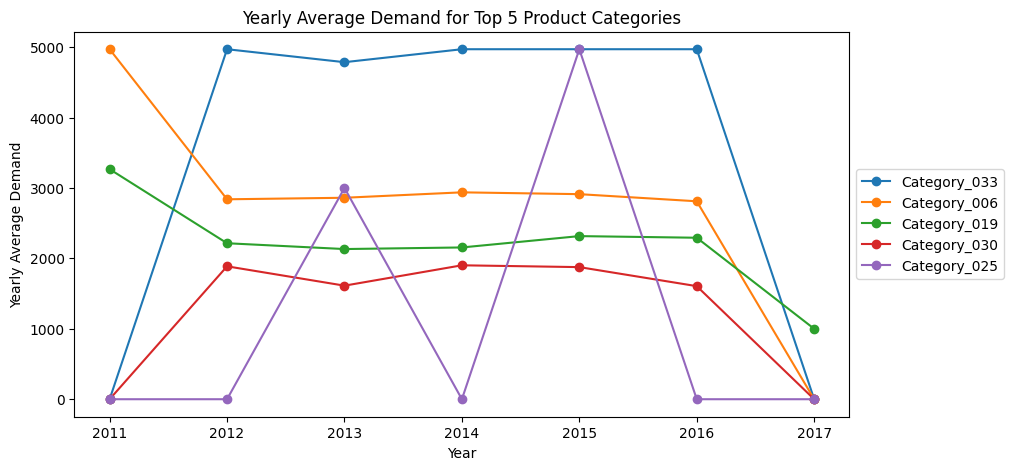

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'year' and 'product category' and calculate the average demand
grouped_data = df.groupby(['year', 'Product_Category'])['Order_Demand'].mean().unstack().fillna(0)

# Calculate the total demand for each product category
category_demand = grouped_data.sum()

# Get the top 10 product categories by demand
top_10_categories = category_demand.nlargest(5).index

# Create a single line chart for all top 5 categories
plt.figure(figsize=(10, 5))
for category in top_10_categories:
    plt.plot(grouped_data.index, grouped_data[category], marker='o', label=category)
plt.title('Yearly Average Demand for Top 5 Product Categories')
plt.xlabel('Year')
plt.ylabel('Yearly Average Demand')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Observation 6: The displayed graph provides insight into the yearly demand patterns of the top 5 Product Categories.

Notably, Category_025 exhibits a perplexing performance marked by fluctuations and unpredictable demand trends.

Conversely, Category_033 stands out with the highest recorded performance, showcasing remarkable consistency in its demand over the years.

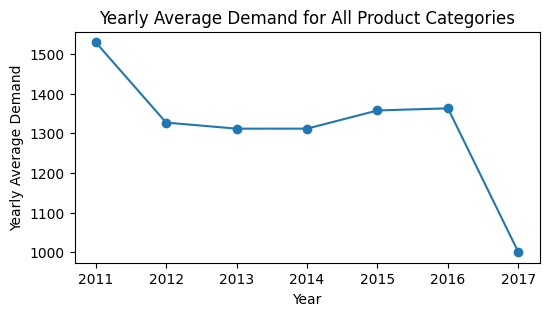

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'year' and calculate the average demand
yearly_demand = df.groupby('year')['Order_Demand'].mean()

# Create a line chart for the yearly average demand
plt.figure(figsize=(6, 3))
plt.plot(yearly_demand.index, yearly_demand, marker='o')
plt.title('Yearly Average Demand for All Product Categories')
plt.xlabel('Year')
plt.ylabel('Yearly Average Demand')
plt.show()


Observation 7: In this graph, it is evident that 2017 stands out as the least performing year, while 2016 shines as the most performing year. The performance in the remaining years closely mirrors that of 2016.

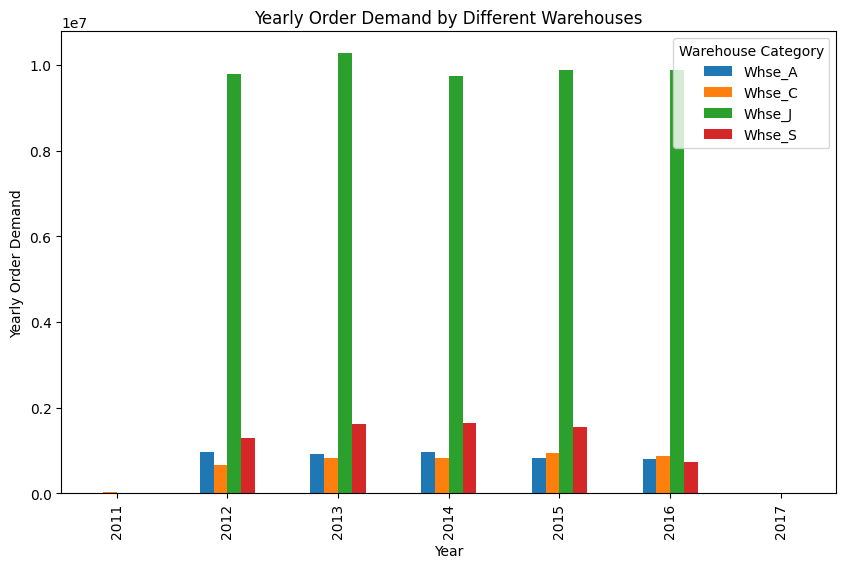

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'year', 'Order_Demand', and 'Warehouse' columns

# Pivot the data to have 'year' as the index, 'Warehouse' as columns, and 'Order_Demand' as values
pivot_df = df.pivot_table(index='year', columns='Warehouse', values='Order_Demand', aggfunc='sum')

# Create a bar chart with bars for each warehouse category side by side
ax = pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Yearly Order Demand by Different Warehouses')
plt.xlabel('Year')
plt.ylabel('Yearly Order Demand')
plt.legend(title='Warehouse Category', loc='upper right')
plt.show()


Observation 8: Warehouse-J exhibits a significantly higher order demand in
contrast to Warehouse-A, which records the lowest demand among all the warehouses. Most notably, all the warehouses achieve their peak operational capacity in the year 2013.

In [ ]:
df.isnull().sum()

Product_Code          0
Warehouse             0
Product_Category      0
Date                  0
Order_Demand        268
year                  0
month                 0
dtype: int64

In [ ]:
df = df.dropna()       #to remove all the null values from the dataset
df.shape

(48782, 7)

In [ ]:
df.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
year                0
month               0
dtype: int64

In [ ]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand               float64
year                         int64
month                       object
dtype: object

In [ ]:
# Define the replacement mapping
replacement_mapping = {'Whse_C': 0, 'Whse_S': 1, 'Whse_A': 2, 'Whse_J': 3}

# Replace values in the "Warehouse" column
df['Warehouse'] = df['Warehouse'].replace(replacement_mapping)

<ipython-input-60-5df85096800b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Warehouse'] = df['Warehouse'].replace(replacement_mapping)


In [ ]:
# Define the mapping from category names to numbers
category_mapping = {
    'Category_001': 1,
    'Category_002': 2,
    'Category_003': 3,
    'Category_004': 4,  # Add more categories as needed
    'Category_005': 5,
    'Category_006': 6,
    'Category_007': 7,
    'Category_008': 8,
    'Category_009': 9,
    'Category_010': 10,
    'Category_011': 11,
    'Category_012': 12,
    'Category_013': 13,
    'Category_014': 14,
    'Category_015': 15,
    'Category_016': 16,
    'Category_017': 17,
    'Category_018': 18,
    'Category_019': 19,
    'Category_020': 20,
    'Category_021': 21,
    'Category_022': 22,
    'Category_023': 23,
    'Category_024': 24,
    'Category_025': 25,
    'Category_026': 26,
    'Category_027': 27,
    'Category_028': 28,
    'Category_029': 29,
    'Category_030': 30,
    'Category_031': 31,
    'Category_032': 32,
    'Category_033': 33,
}

# Replace values in the "Product_Category" column
df['Product_Category'] = df['Product_Category'].replace(category_mapping)


<ipython-input-61-a694157acd9d>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_Category'] = df['Product_Category'].replace(category_mapping)


In [ ]:
df.shape

(48782, 7)

In [ ]:
X = df.drop(['Product_Code','Date','Order_Demand'], axis = 1)
X.head()

,Warehouse,Product_Category,year,month
781974,2,7,2015,11
937737,3,19,2016,04
907828,0,7,2016,11
784628,2,19,2015,09
662460,3,1,2015,04


In [ ]:
y = df.Order_Demand
y.head()

781974      20.0
937737     950.0
907828     320.0
784628    1000.0
662460       1.0
Name: Order_Demand, dtype: float64

## Spliting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

#spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape,  X_test.shape,  y_train.shape, y_test.shape)

(32683, 4) (16099, 4) (32683,) (16099,)


## **Checking all the Model performance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)

# Check the accuracy score on the test data
score = model.score(X_test, y_test)

print(f"Accuracy Score: {score:.2f}")

Accuracy Score: 0.17


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a Logistic Regression model
model1 = DecisionTreeClassifier()

# Train (fit) the model on the training data
model1.fit(X_train, y_train)

# Check the accuracy score on the test data
score1 = model1.score(X_test, y_test)

print(f"Accuracy Score: {score1:.2f}")

Accuracy Score: 0.25


In [ ]:
# Create a Logistic Regression model
model2 = RandomForestClassifier()

# Train (fit) the model on the training data
model2.fit(X_train, y_train)

# Check the accuracy score on the test data
score2 = model1.score(X_test, y_test)

print(f"Accuracy Score: {score2:.2f}")

Accuracy Score: 0.25


In [ ]:
# Initialize and train a classifier (e.g., DecisionTreeClassifier)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy Score: 0.25
Confusion Matrix:
 [[ 341   19    1 ...    0    0   41]
 [   8  569   72 ...    0    0   66]
 [   5  245   52 ...    0    0   34]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [  91   21    4 ...    0    0 2282]]
